# Segundo dataset

Dataset escolhido: *TODO - choose a dataset*

## Carregar os dados 

In [1]:
import pandas as pd

path_to_file = 'data/car.csv'

df = pd.read_csv(path_to_file)

df.head()

,buying,maint,doors,persons,lug_boot,safety,evaulation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Pré-processamento

### Label Encoding

Foi utilizado Label Encoding para o target (evaulation)

In [2]:
columns_to_transform = ['evaulation']

for column in columns_to_transform:
    df[column] = df[column].astype('category').cat.codes

df

,buying,maint,doors,persons,lug_boot,safety,evaulation
0,vhigh,vhigh,2,2,small,low,2
1,vhigh,vhigh,2,2,small,med,2
2,vhigh,vhigh,2,2,small,high,2
3,vhigh,vhigh,2,2,med,low,2
4,vhigh,vhigh,2,2,med,med,2
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,1
1724,low,low,5more,more,med,high,3
1725,low,low,5more,more,big,low,2
1726,low,low,5more,more,big,med,1


### One Hot Encoding

In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_transformer = make_column_transformer(
    (OneHotEncoder(), ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']),
    remainder='passthrough'
)

# Aplicando a transformação
df_transformed = column_transformer.fit_transform(df)

# Obtendo os nomes das colunas transformadas
column_names = column_transformer.get_feature_names_out()

# Criando um novo DataFrame com os nomes corretos
df = pd.DataFrame(df_transformed, columns=column_names)

# Remove o prefixo do one-hot encoding
df.columns = [col.split('__')[-1] for col in column_names]

df.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,evaulation
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0


### Separando os dados

Separação dos dados em features (X) e target (y)

In [4]:
y = df['evaulation']
X = df.drop('evaulation', axis=1)

X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1724,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1726,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


## Treinamento dos Modelos

### Criação dos Folds

In [5]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import numpy as np

to_percent = lambda x: round(x * 100)

X = np.array(X)
y = np.array(y)

N_FOLDS = 10
kf = StratifiedKFold(n_splits=N_FOLDS)

x_train = [] # features de treino
y_train = [] # target de treino

x_test = [] # features de teste
y_test = [] # target de teste

for train_index, test_index in kf.split(X, y):
    x_train.append(X[train_index])
    y_train.append(y[train_index])

    x_test.append(X[test_index])
    y_test.append(y[test_index])

### Árvore de Decisão

In [6]:
from sklearn.tree import DecisionTreeClassifier

TREE_RANDOM_STATE = 42

entropy_results = []
gini_results = []

for i in range(N_FOLDS):
    model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=TREE_RANDOM_STATE)
    model_gini = DecisionTreeClassifier(criterion='gini', random_state=TREE_RANDOM_STATE)

    # Treina e avalia o modelo com critério 'entropy'
    model_entropy.fit(x_train[i], y_train[i])
    pred_entropy = model_entropy.predict(x_test[i])
    entropy_results.append(metrics.accuracy_score(pred_entropy, y_test[i]))

    # Treina e avalia o modelo com critério 'gini'
    model_gini.fit(x_train[i], y_train[i])
    pred_gini = model_gini.predict(x_test[i])
    gini_results.append(metrics.accuracy_score(pred_gini, y_test[i]))

print(f'Entropy: {to_percent(np.mean(entropy_results))}%')
print(f'Gini: {to_percent(np.mean(gini_results))}%')

Entropy: 84%
Gini: 84%


### K-Nearest Neighbors (KNN)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

five_neighbors_results = []
ten_neighbors_results = []

for i in range(N_FOLDS):
    five_knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    ten_knn_model = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

    # Predição com 5 vizinhos
    five_knn_model.fit(x_train[i], y_train[i])
    pred_five_knn = five_knn_model.predict(x_test[i])
    five_neighbors_results.append(metrics.accuracy_score(pred_five_knn, y_test[i]))

    # Predição com 10 vizinhos
    ten_knn_model.fit(x_train[i], y_train[i])
    pred_ten_knn = ten_knn_model.predict(x_test[i])
    ten_neighbors_results.append(metrics.accuracy_score(pred_ten_knn, y_test[i]))

print(f'KNN - 5: {to_percent(np.mean(five_neighbors_results))}%')
print(f'KNN - 10: {to_percent(np.mean(ten_neighbors_results))}%')

KNN - 5: 72%
KNN - 10: 79%


### Multilayer Perceptron (MLP)

In [8]:
from sklearn.neural_network import MLPClassifier

FIRST_ARCHITECTURE = (10, 2,)
SECOND_ARCHITECTURE = (50, )

mlp_first_architecture_results = {
    'tanh': {
        'results': [],
        'loss': [],
    },
    'relu': {
        'results': [],
        'loss': [],
    }
}

mlp_second_architecture_results = {
    'tanh': {
        'results': [],
        'loss': [],
    },
    'relu': {
        'results': [],
        'loss': [],
    }
}


In [9]:
for i in range(N_FOLDS):
    first_tanh_model = MLPClassifier(hidden_layer_sizes=FIRST_ARCHITECTURE, activation='tanh', max_iter=1000)
    first_relu_model = MLPClassifier(hidden_layer_sizes=FIRST_ARCHITECTURE, activation='relu', max_iter=1000)

    second_tanh_model = MLPClassifier(hidden_layer_sizes=SECOND_ARCHITECTURE, activation='tanh', max_iter=1000)
    second_relu_model = MLPClassifier(hidden_layer_sizes=SECOND_ARCHITECTURE, activation='relu', max_iter=1000)

    # Primeira arquitetura com função de ativação tanh
    first_tanh_model.fit(x_train[i], y_train[i])
    pred_first_tanh = first_tanh_model.predict(x_test[i])
    mlp_first_architecture_results['tanh']['results'].append(metrics.accuracy_score(pred_first_tanh, y_test[i]))
    mlp_first_architecture_results['tanh']['loss'].append(first_tanh_model.loss_curve_)

    # Primeira arquitetura com função de ativação relu
    first_relu_model.fit(x_train[i], y_train[i])
    pred_first_relu = first_relu_model.predict(x_test[i])
    mlp_first_architecture_results['relu']['results'].append(metrics.accuracy_score(pred_first_relu, y_test[i]))
    mlp_first_architecture_results['relu']['loss'].append(first_relu_model.loss_curve_)

    # Segunda arquitetura com função de ativação tanh
    second_tanh_model.fit(x_train[i], y_train[i])
    pred_second_tanh = second_tanh_model.predict(x_test[i])
    mlp_second_architecture_results['tanh']['results'].append(metrics.accuracy_score(pred_second_tanh, y_test[i]))
    mlp_second_architecture_results['tanh']['loss'].append(second_tanh_model.loss_curve_)

    # Segunda arquitetura com função de ativação relu
    second_relu_model.fit(x_train[i], y_train[i])
    pred_second_relu = second_relu_model.predict(x_test[i])
    mlp_second_architecture_results['relu']['results'].append(metrics.accuracy_score(pred_second_relu, y_test[i]))
    mlp_second_architecture_results['relu']['loss'].append(second_relu_model.loss_curve_)

print(f'MLP - Primeira arquitetura - tanh: {to_percent(np.mean(mlp_first_architecture_results["tanh"]["results"]))}%')
print(f'MLP - Primeira arquitetura - relu: {to_percent(np.mean(mlp_first_architecture_results["relu"]["results"]))}%')
print(f'MLP - Segunda arquitetura - tanh: {to_percent(np.mean(mlp_second_architecture_results["tanh"]["results"]))}%')
print(f'MLP - Segunda arquitetura - relu: {to_percent(np.mean(mlp_second_architecture_results["relu"]["results"]))}%')

/home/paulo/Projects/mlalgos/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulo/Projects/mlalgos/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulo/Projects/mlalgos/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paulo/Projects/mlalgos/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
 

MLP - Primeira arquitetura - tanh: 87%
MLP - Primeira arquitetura - relu: 89%
MLP - Segunda arquitetura - tanh: 88%
MLP - Segunda arquitetura - relu: 90%


## K-Means

In [10]:
from typing import List
from sklearn.cluster import KMeans
from collections import Counter


def create_cluster_label_mapping_lists(n_clusters: int) -> List[List[int]]:
  """
  Cria uma lista de listas para armazenar os rótulos (targets) associados a cada cluster.

  Parâmetros
  ----------
  n_clusters : int
    Número total de clusters.
  
  Retorna
  ----------
  List[List[int]]
    Lista onde cada índice representa um cluster e contém uma lista de targets associados a esse cluster.
  """
  return [[] for i in range(n_clusters)]

def map_clusters_to_labels(model: KMeans, n_clusters: int, y_train: np.ndarray):
  """
    Mapeia os clusters do modelo KMeans para seus respectivos rótulos (targets) com base no conjunto de treinamento.

    Parâmetros
    ----------
    model : KMeans
        Modelo KMeans treinado, contendo as atribuições de cluster para os dados de treinamento.
    n_clusters : int
        Número total de clusters.
    y_train : np.ndarray
        Array contendo os rótulos reais (targets) do conjunto de treinamento.

    Retorna
    -------
    List[List[int]]
        Lista onde cada índice representa um cluster e contém uma lista de targets associados a esse cluster.
    """
  labels = model.labels_
  y_train_as_list = y_train.tolist()
  mapped_cluster_labels = create_cluster_label_mapping_lists(n_clusters)

  for i in range(len(y_train)):
    cluster = labels[i]
    mapped_cluster_labels[cluster].append(y_train_as_list[i])

  return mapped_cluster_labels

def create_label_to_class_mapping(mapped_cluster_labels: List[List[int]], n_clusters: int) -> dict[int, int]:
    """
    Determina a classe predominante (target mais frequente) associada a cada cluster.

    Parâmetros
    ----------
    mapped_cluster_labels : List[List[int]]
        Lista onde cada índice representa um cluster e contém uma lista de targets associados a esse cluster.
    n_clusters : int
        Número total de clusters.

    Retorna
    -------
    dict[int, int]
        Dicionário onde as chaves representam os clusters e os valores correspondem à classe predominante em cada cluster.
    """
    mapping = {}
    
    for c in range(n_clusters):
        counter = Counter(mapped_cluster_labels[c])  # Conta a frequência dos targets no cluster
        target = counter.most_common(1)[0][0]  # Obtém o target mais frequente no cluster
        mapping[c] = target  # Associa o cluster à classe predominante
    
    return mapping

In [11]:

from sklearn.cluster import KMeans


NUM_CLUSTERS = len(set(y))

kmeans_results = []

for i in range(N_FOLDS):
  kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
  kmeans_model = kmeans_model.fit(x_train[i])

  mapped_cluster_labels = map_clusters_to_labels(kmeans_model, NUM_CLUSTERS, y_train[i])
  mapping = create_label_to_class_mapping(mapped_cluster_labels, NUM_CLUSTERS)

  current_result = kmeans_model.predict(x_test[i])
  current_result = [mapping[i] for i in current_result]

  kmeans_results.append(metrics.accuracy_score(y_test[i], current_result))

print(f'KMeans: {to_percent(np.mean(kmeans_results))}%')

KMeans: 71%


## Resumo dos resultados

In [12]:
models = {
    "Árvore de Decisão (Entropy)": entropy_results,
    "Árvore de Decisão (Gini)": gini_results,
    "KNN (5 vizinhos)": five_neighbors_results,
    "KNN (10 vizinhos)": ten_neighbors_results,
    "MLP - Primeira Arq. (tanh)": mlp_first_architecture_results["tanh"]["results"],
    "MLP - Primeira Arq. (relu)": mlp_first_architecture_results["relu"]["results"],
    "MLP - Segunda Arq. (tanh)": mlp_second_architecture_results["tanh"]["results"],
    "MLP - Segunda Arq. (relu)": mlp_second_architecture_results["relu"]["results"],
    "KMeans": kmeans_results
}

for model, results in models.items():
    accuracy = to_percent(np.mean(results))
    print(f"{model}: Acerto: {accuracy}% - Erro: {100 - accuracy}%")


Árvore de Decisão (Entropy): Acerto: 84% - Erro: 16%
Árvore de Decisão (Gini): Acerto: 84% - Erro: 16%
KNN (5 vizinhos): Acerto: 72% - Erro: 28%
KNN (10 vizinhos): Acerto: 79% - Erro: 21%
MLP - Primeira Arq. (tanh): Acerto: 87% - Erro: 13%
MLP - Primeira Arq. (relu): Acerto: 89% - Erro: 11%
MLP - Segunda Arq. (tanh): Acerto: 88% - Erro: 12%
MLP - Segunda Arq. (relu): Acerto: 90% - Erro: 10%
KMeans: Acerto: 71% - Erro: 29%


### Curvas de loss para cada modelo do MLP
São exibidas 10 curvas por modelo, isto é, uma para cada fold.

Curvas de erro para a primeira arquitetura da MLP com função de ativação tanh


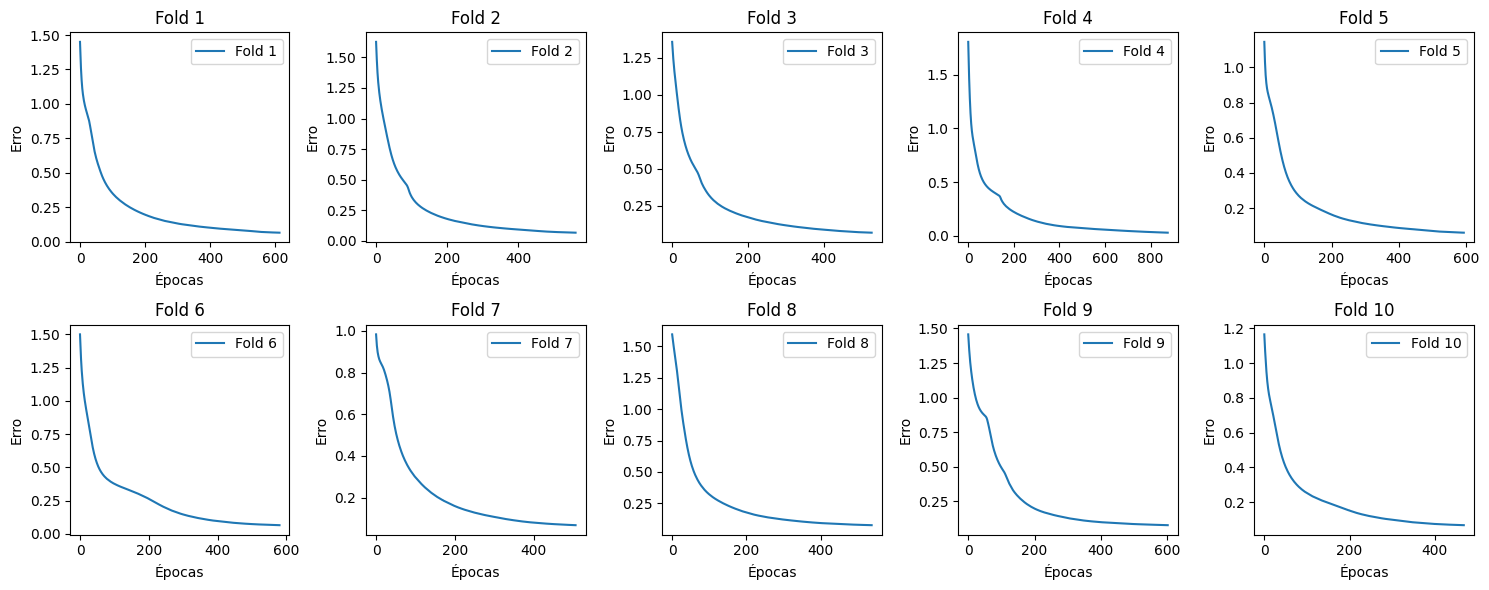

Curvas de erro para a primeira arquitetura da MLP com função de ativação relu


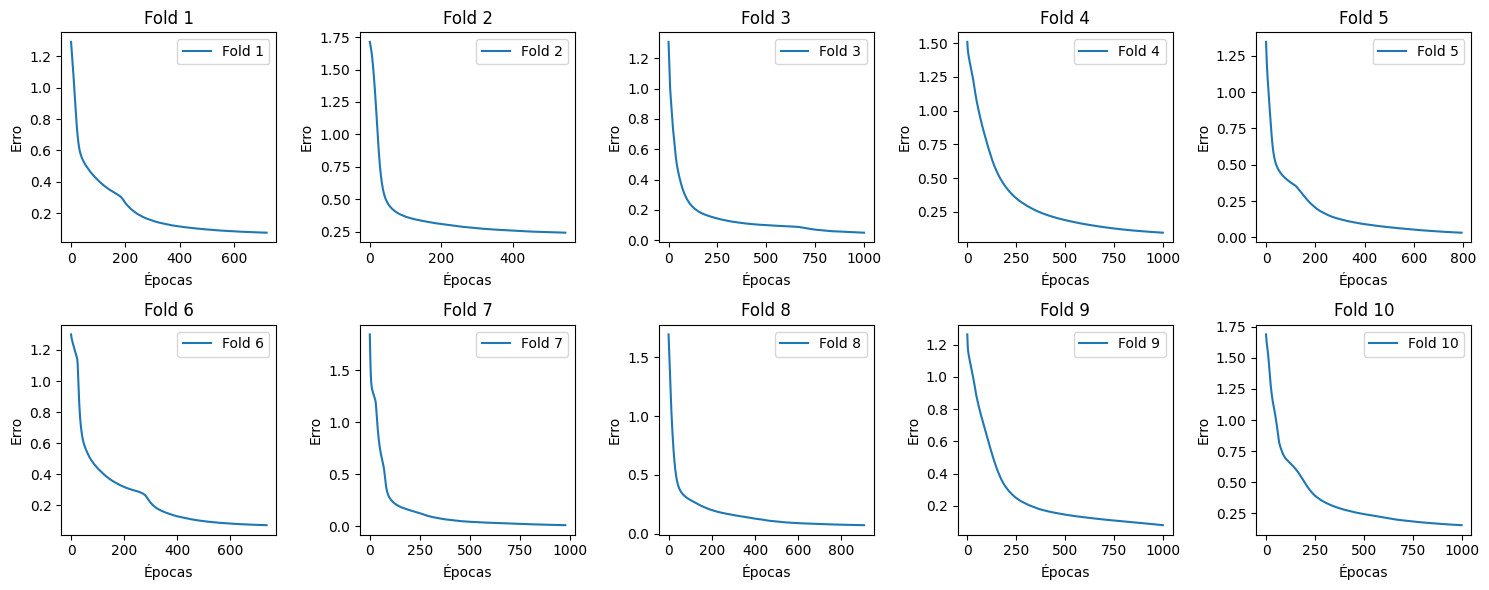

Curvas de erro para a segunda arquitetura da MLP com função de ativação tanh


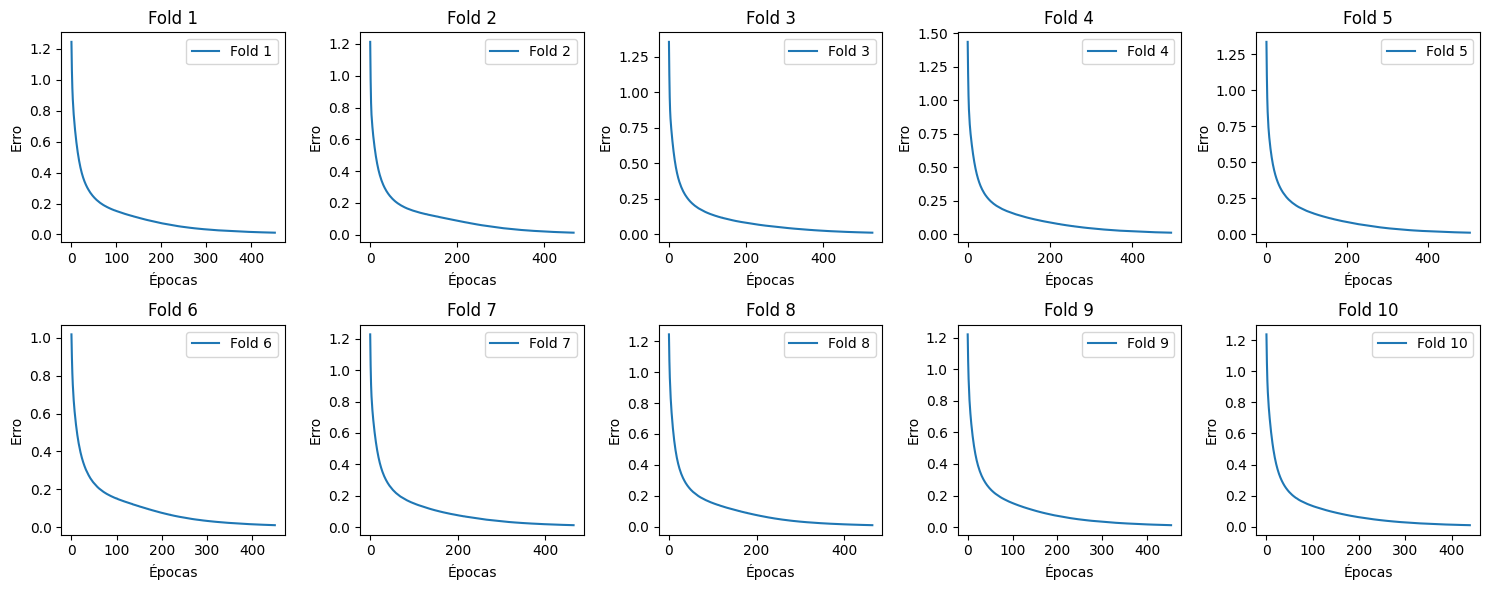

Curvas de erro para a segunda arquitetura da MLP com função de ativação relu


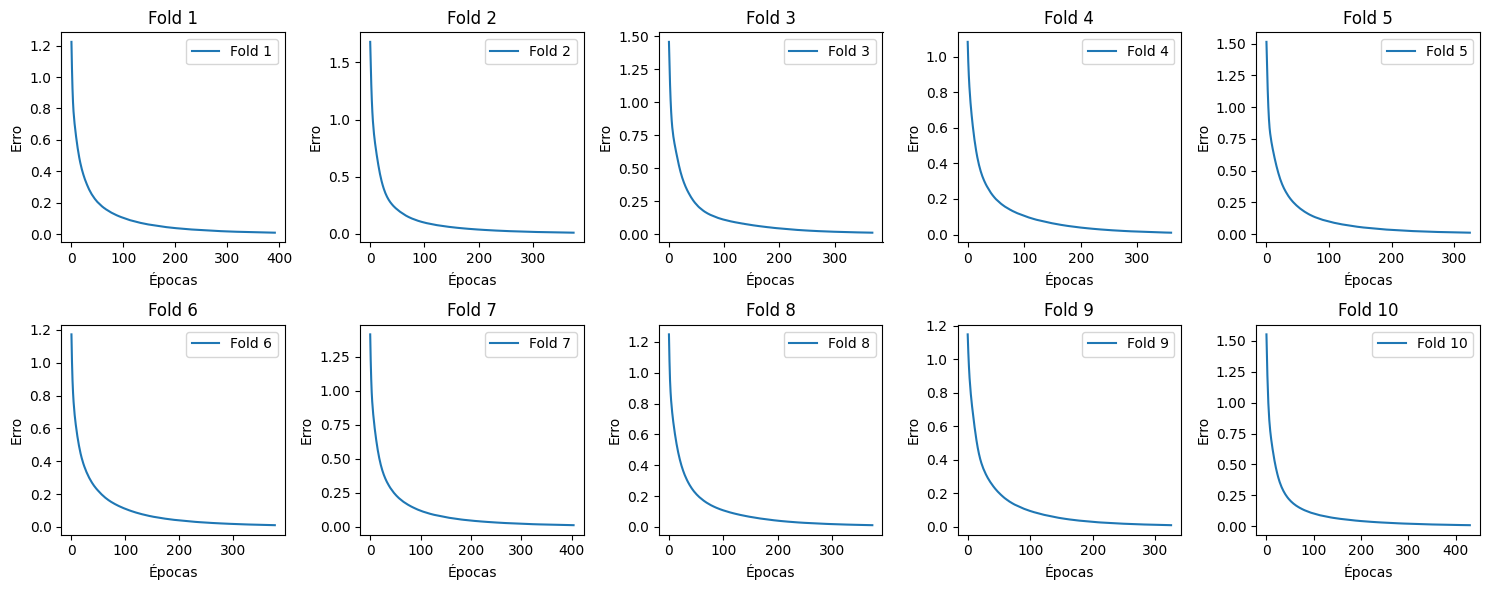

In [16]:
import matplotlib.pyplot as plt


def plot_mlp_loss_curves(loss_curves):
    """
    Gera gráficos individuais da curva de erro (loss) durante o treinamento da MLP para cada fold.
    """

    # Configuração dos subplots: 2 linhas x 5 colunas (para até 10 folds)
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    axes = axes.flatten()

    for index, history in enumerate(loss_curves):
        axes[index].plot(history, label=f"Fold {index+1}")
        axes[index].set_xlabel("Épocas")
        axes[index].set_ylabel("Erro")
        axes[index].set_title(f"Fold {index+1}")
        axes[index].legend()

    plt.tight_layout()
    plt.show()

print("Curvas de erro para a primeira arquitetura da MLP com função de ativação tanh")
plot_mlp_loss_curves(mlp_first_architecture_results['tanh']['loss'])

print("Curvas de erro para a primeira arquitetura da MLP com função de ativação relu")
plot_mlp_loss_curves(mlp_first_architecture_results['relu']['loss'])

print("Curvas de erro para a segunda arquitetura da MLP com função de ativação tanh")
plot_mlp_loss_curves(mlp_second_architecture_results['tanh']['loss'])

print("Curvas de erro para a segunda arquitetura da MLP com função de ativação relu")
plot_mlp_loss_curves(mlp_second_architecture_results['relu']['loss'])